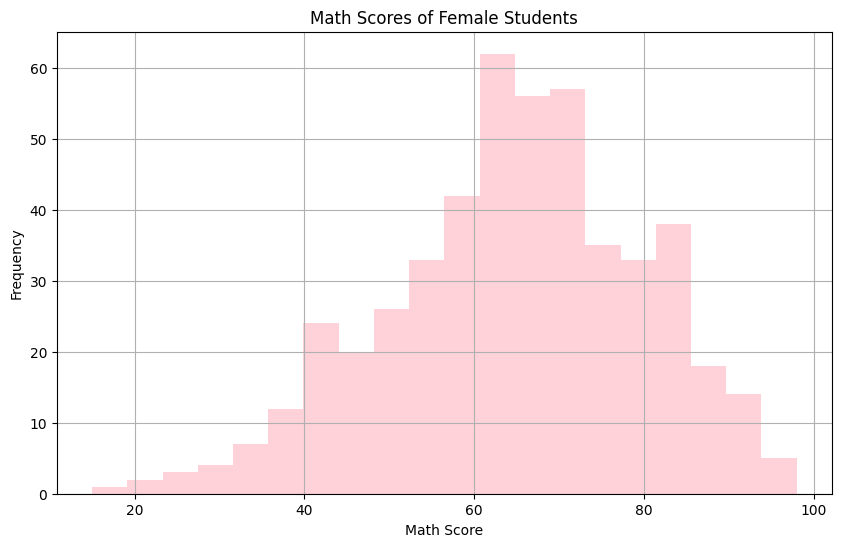

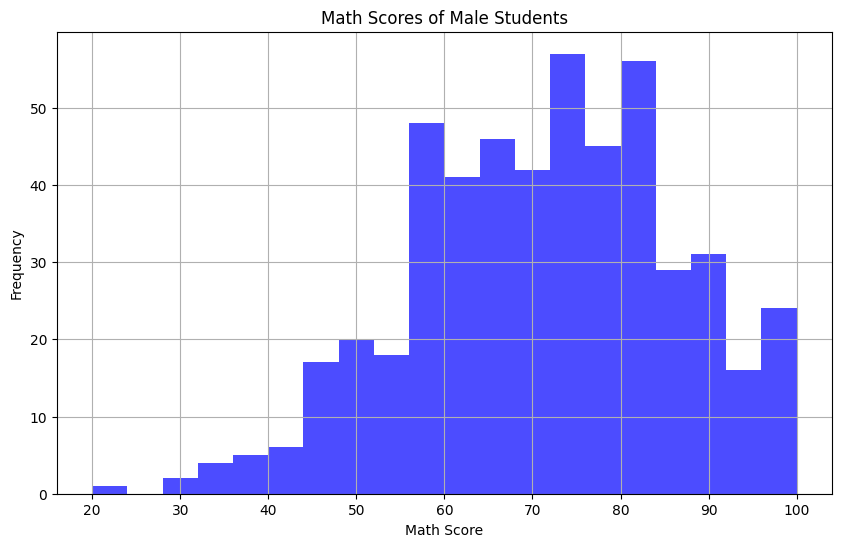

In [1]:
# Importiere benötigte Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression

# Lade die Daten
df = pd.read_csv("../data/exams.csv")

# Funktion zum Plotten von Mathematiknoten nach Geschlecht
def plot_gender(gender_data, gender_name, color):
    plt.figure(figsize=(10, 6))
    plt.hist(gender_data['math score'], bins=20, color=color, alpha=0.7)
    plt.title(f'Math Scores of {gender_name.capitalize()} Students')
    plt.xlabel('Math Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Daten nach Geschlecht trennen
female_students = df[df['gender'] == 'female']
male_students = df[df['gender'] == 'male']

# Plotting
plot_gender(female_students, 'female', 'pink')
plot_gender(male_students, 'male', 'blue')

# Clustering-Funktion
def clustering(data):
    # Wähle relevante Features für das Clustering: math score, reading score, writing score
    features = data[['math score', 'reading score', 'writing score']]

    # Wende KMeans Clustering an
    kmeans = KMeans(n_clusters=3, random_state=42)
    data['cluster'] = kmeans.fit_predict(features)

    # Plotten der Cluster in Bezug auf race/ethnicity
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='math score', y='reading score', hue='cluster', style='race/ethnicity', data=data, palette='Set1', s=100)
    plt.title('Clustering of Grade Performances with Respect to Race/Ethnicity')
    plt.xlabel('Math Score')
    plt.ylabel('Reading Score')
    plt.grid(True)
    plt.show()


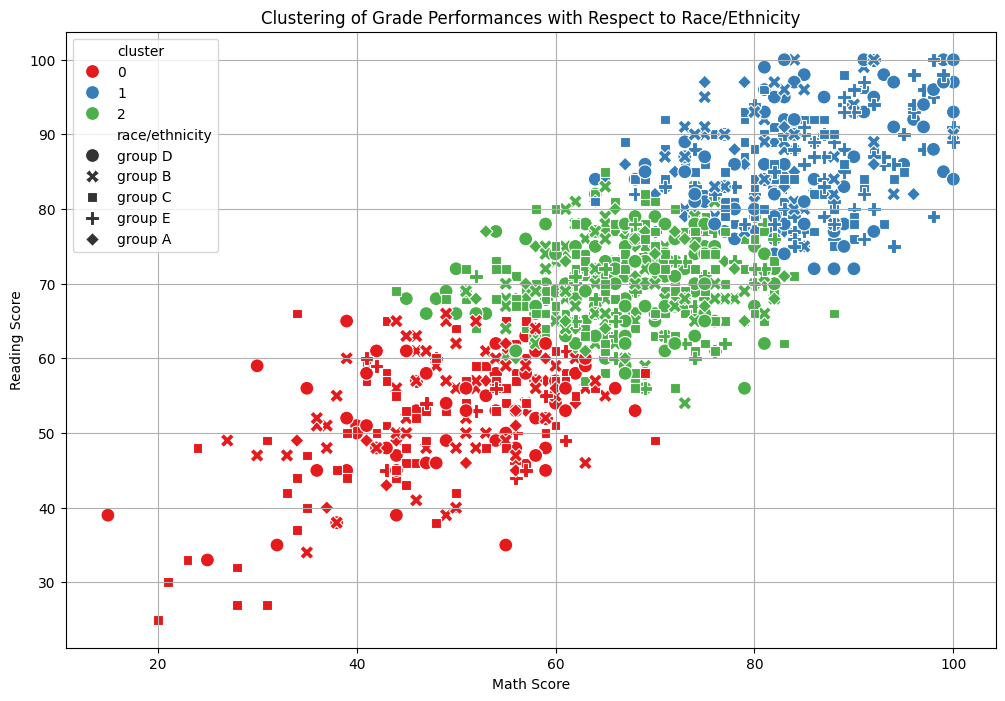

In [3]:
# Rufe die Clustering-Funktion auf
clustering(df)

In [4]:
# Durchschnitts- und Medianwerte der Noten nach Ethnie
mean_ethnicity = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
median_ethnicity = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].median()

print(mean_ethnicity)
print(median_ethnicity)

                math score  reading score  writing score
race/ethnicity                                          
group A          65.696203      69.202532      67.848101
group B          64.070707      68.530303      66.717172
group C          65.510836      68.609907      66.804954
group D          68.879377      70.929961      71.058366
group E          77.426573      76.615385      75.034965
                math score  reading score  writing score
race/ethnicity                                          
group A               65.0           70.0           69.0
group B               64.0           68.0           67.0
group C               66.0           69.0           68.0
group D               69.0           71.0           72.0
group E               80.0           78.0           77.0


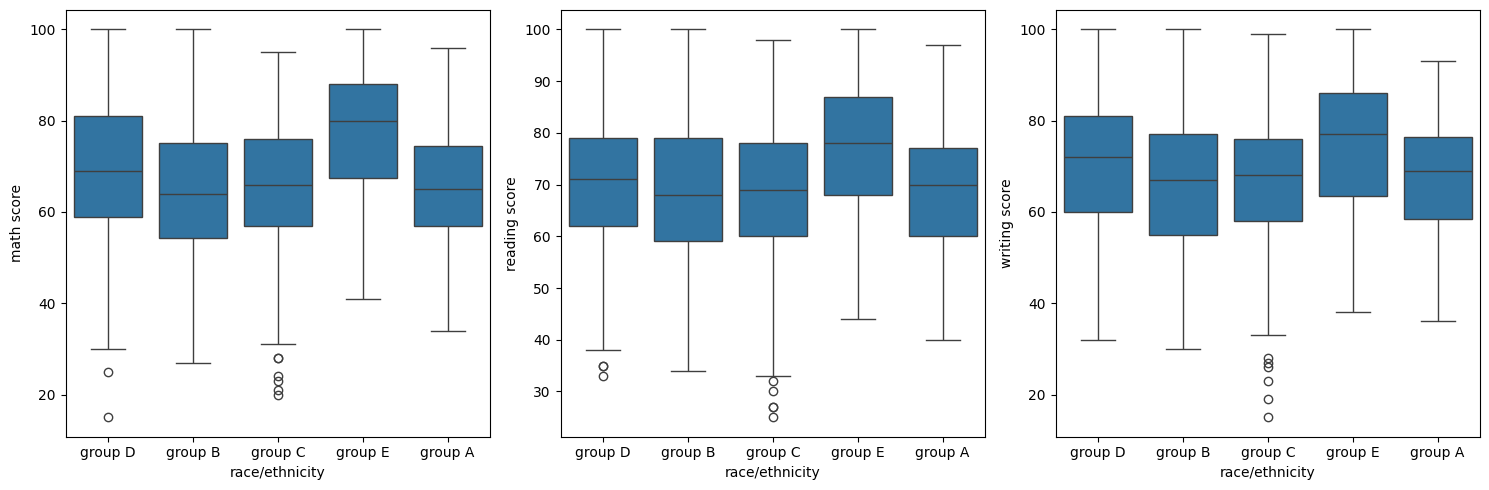

In [5]:
# Boxplots für die Noten nach Ethnie
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='race/ethnicity', y='math score', data=df)
plt.subplot(1, 3, 2)
sns.boxplot(x='race/ethnicity', y='reading score', data=df)
plt.subplot(1, 3, 3)
sns.boxplot(x='race/ethnicity', y='writing score', data=df)
plt.tight_layout()
plt.show()

In [10]:
# Bereite Daten für ANOVA-Tests vor
math_scores = [df[df['race/ethnicity'] == group]['math score'] for group in df['race/ethnicity'].unique()]
reading_scores = [df[df['race/ethnicity'] == group]['reading score'] for group in df['race/ethnicity'].unique()]
writing_scores = [df[df['race/ethnicity'] == group]['writing score'] for group in df['race/ethnicity'].unique()]

# ANOVA-Tests
f_stat_math, p_value_math = f_oneway(*math_scores)
f_stat_reading, p_value_reading = f_oneway(*reading_scores)
f_stat_writing, p_value_writing = f_oneway(*writing_scores)

print("ANOVA Results for Math: F-statistic = {}, p-value = {}".format(f_stat_math, p_value_math))
print("ANOVA Results for Reading: F-statistic = {}, p-value = {}".format(f_stat_reading, p_value_reading))
print("ANOVA Results for Writing: F-statistic = {}, p-value = {}".format(f_stat_writing, p_value_writing))

ANOVA Results for Math: F-statistic = 21.327639720047287, p-value = 6.787457736892939e-17
ANOVA Results for Reading: F-statistic = 9.665646867684721, p-value = 1.1375470460352965e-07
ANOVA Results for Writing: F-statistic = 10.302734512088241, p-value = 3.5423160599716694e-08
